In [1]:
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
import ligo.skymap.plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import healpy as hp
from matplotlib.colors import TwoSlopeNorm
from astropy.coordinates import SkyCoord
import pickle

import sys, os
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files/'))

print(sys.path)
from datetime import datetime
import astropy.time as at
from pyspi.utils.function_utils import find_response_version
from pyspi.utils.response.spi_response_data import ResponseDataRMF
from pyspi.utils.response.spi_response import ResponseRMFGenerator
from pyspi.utils.response.spi_drm import SPIDRM
from pyspi.utils.livedets import get_live_dets
from MultinestClusterFit import powerlaw_binned_spectrum
from astromodels import Powerlaw,  PointSource, SpectralComponent

['/home/tguethle/Documents/spi/Master_Thesis/main_files', '/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source', '/home/tguethle/.opt/conda/envs/spi39/lib/python39.zip', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9/lib-dynload', '', '/home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages']


12:12:29 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=632259;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=621719;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=578577;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=725990;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=425887;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=501276;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

12:12:29 INFO      Starting 3ML!                                                                     ]8;id=519973;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=970961;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

12:12:30 WARNING   ROOT minimizer not available                                                ]8;id=376061;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=742525;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=372862;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=271673;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

12:12:30 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=401995;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=255757;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=584235;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759445;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=817150;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=426265;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=611014;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=736256;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 03/07/06 06:00:00 and 04/07/17 08:20:06 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 09/02/19 09:59:57 and 10/05/27 12:45:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)


In [5]:
%matplotlib inline



In [6]:


n = 100

energies = np.geomspace(40, 1200, 101, dtype=np.uint64) / 2

E_bins_100 = list(energies)




# Spimodfit Output files

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_bright_100_new/spectra_sim_sourc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     34   1R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPECTRUM      1 BinTableHDU    117   41R x 8C   [1I, 1E, 1E, 1E, 1I, 1I, 1E, 1E]   


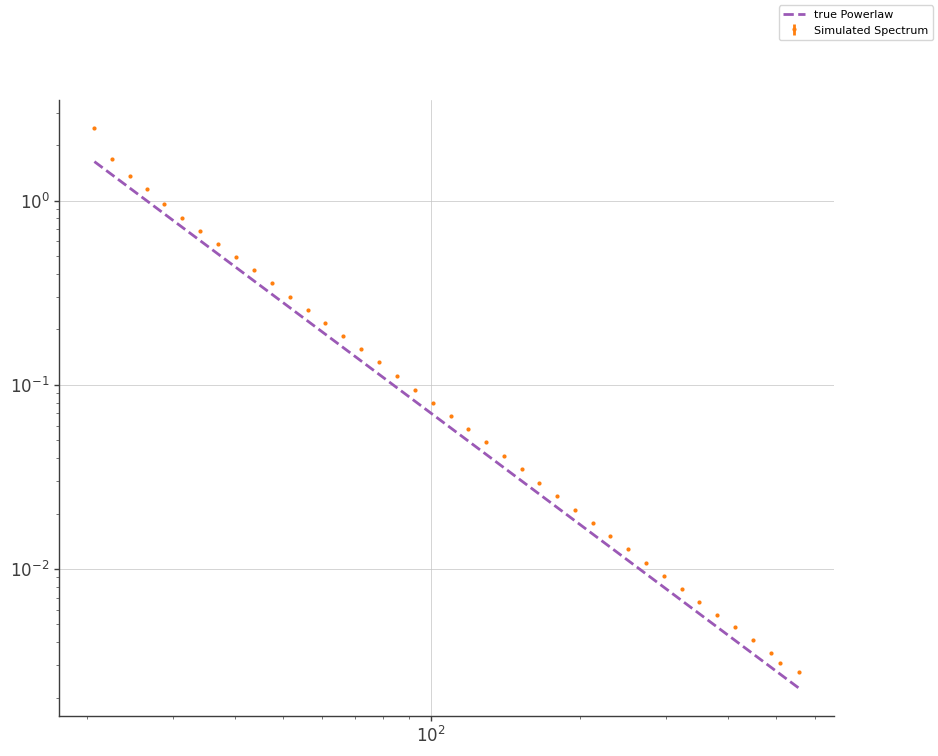

In [60]:
spectrum = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_bright_100_new/spectra_sim_sourc.fits'
spectrum_100_bins = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_100_bins_source/spectra_sim_sourc.fits'
normal_E_Bins = [20.0, 21.5, 23.5, 25.5, 27.5, 30.0, 32.5, 35.5, 38.5, 42.0, 45.5, 49.5, 54.0, 58.5, 63.5, 69.0, 75.0, 81.5, 89.0, 96.5, 105.0, 114.0, 124.0, 134.5, 146.0, 159.0, 172.5, 187.5, 204.0, 221.5, 240.5, 261.5, 284.0, 308.5, 335.5, 364.5, 396.0, 430.0, 467.5, 508.0, 514, 600]
energies = np.array([(i+j)/2 for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
energies_100_bins = np.array([(i+j)/2 for i, j in zip(E_bins_100[:-1], E_bins_100[1:])])
bin_widths = np.array([j-i for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
bin_widths_100 = np.array([j-i for i, j in zip(E_bins_100[:-1], E_bins_100[1:])])

wide_E_Bins = [20, 29, 43, 62, 91, 132, 193, 282, 411, 600]
wide_energies = np.array([(i+j)/2 for i, j in zip(wide_E_Bins[:-1], wide_E_Bins[1:])])


with fits.open(spectrum) as hdul:
    hdul.info()
    data = hdul[2].data
    groupings = hdul[1].data
    header = hdul[2].header


def powerlaw(x, K, index, piv):
    return K * (x/piv)**index

flux = data['DFLUX'] 

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

#plt.scatter(energies, data['RATE'])
ax.errorbar(energies, data['DFLUX'], yerr=data['DFLUX_ERR'], c='tab:orange', linestyle='None', marker='o', markersize=2, zorder=2, label='Simulated Spectrum')
ax.plot(energies, powerlaw(energies, 7e-2, -2.0, 100.0), linestyle='dashed', label='true Powerlaw')
#ax.plot(energies, powerlaw(energies, 7.04e-4, -2.043, 100.0), linestyle='dashed', label='best fit Powerlaw')

#plt.plot(energies, powerlaw(energies, 7e-2, -2.0, 100.0))
#plt.scatter(energies, flux, c='tab:green')
#plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
fig.legend()


Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_43_44_45_crab/spectra_Crab.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     34   1R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPI.-PHA1-SPE    1 BinTableHDU    117   41R x 8C   [1I, 1E, 1E, 1E, 1I, 1I, 1E, 1E]   


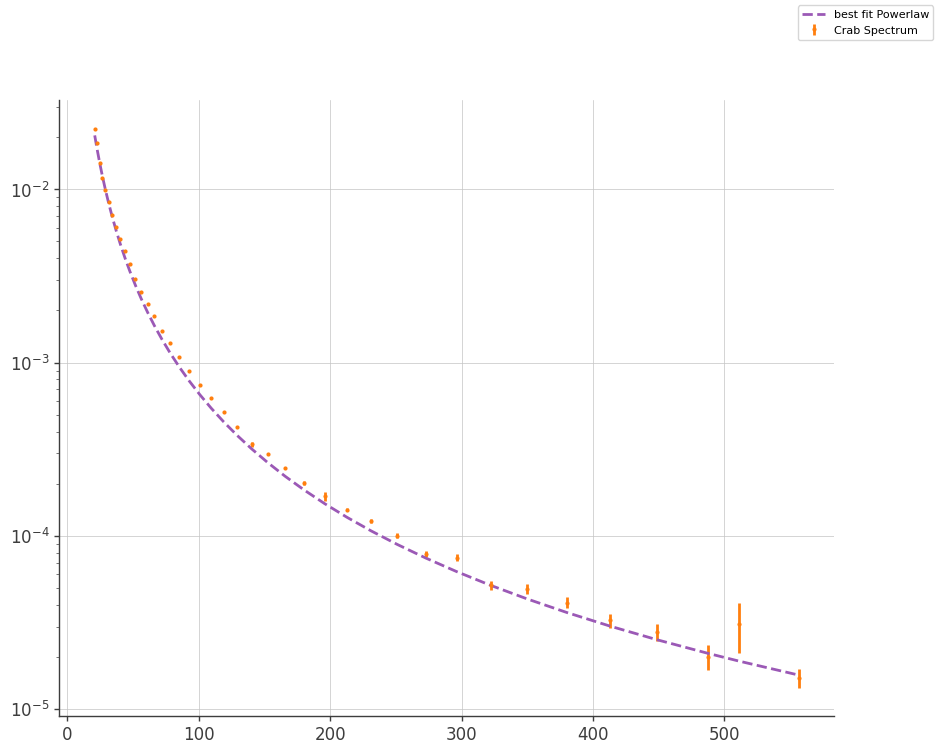

In [8]:
# crab

spectrum = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_43_44_45_crab/spectra_Crab.fits'
spectrum_100_bins = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_100_bins_source/spectra_sim_sourc.fits'
normal_E_Bins = [20.0, 21.5, 23.5, 25.5, 27.5, 30.0, 32.5, 35.5, 38.5, 42.0, 45.5, 49.5, 54.0, 58.5, 63.5, 69.0, 75.0, 81.5, 89.0, 96.5, 105.0, 114.0, 124.0, 134.5, 146.0, 159.0, 172.5, 187.5, 204.0, 221.5, 240.5, 261.5, 284.0, 308.5, 335.5, 364.5, 396.0, 430.0, 467.5, 508.0, 514, 600]
energies = np.array([(i+j)/2 for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
energies_100_bins = np.array([(i+j)/2 for i, j in zip(E_bins_100[:-1], E_bins_100[1:])])
bin_widths = np.array([j-i for i, j in zip(normal_E_Bins[:-1], normal_E_Bins[1:])])
bin_widths_100 = np.array([j-i for i, j in zip(E_bins_100[:-1], E_bins_100[1:])])

wide_E_Bins = [20, 29, 43, 62, 91, 132, 193, 282, 411, 600]
wide_energies = np.array([(i+j)/2 for i, j in zip(wide_E_Bins[:-1], wide_E_Bins[1:])])


with fits.open(spectrum) as hdul:
    hdul.info()
    data = hdul[2].data
    groupings = hdul[1].data
    header = hdul[2].header


def powerlaw(x, K, index, piv):
    return K * (x/piv)**index

flux = data['DFLUX'] 

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

#plt.scatter(energies, data['RATE'])
ax.errorbar(energies, data['DFLUX'], yerr=data['DFLUX_ERR'], c='tab:orange', linestyle='None', marker='o', markersize=2, zorder=2, label='Crab Spectrum')
#ax.plot(energies, powerlaw(energies, 7e-4, -2.0, 100.0), linestyle='dashed', label='true Powerlaw')
ax.plot(energies, powerlaw(energies, 6.64e-4, -2.18, 100.0), linestyle='dashed', label='best fit Powerlaw')

#plt.plot(energies, powerlaw(energies, 7e-2, -2.0, 100.0))
#plt.scatter(energies, flux, c='tab:green')
#plt.xscale('log')
plt.yscale('log')
#plt.xscale('log')
fig.legend()


In [9]:
result = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectral_response.rmf.fits'

with fits.open(result) as hdul:
    hdul.info()
    data = hdul[2].data
    t = Table(data)
t


Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_real_bkg_para2/spectral_response.rmf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     50   2R x 9C   [8A, 32A, 1J, 1J, 256A, 3A, 1I, 1D, 1D]   
  2  MATRIX        1 BinTableHDU     46   206R x 6C   [1E, 1E, 1I, 1I, 1I, 1PE(41)]   
  3  EBOUNDS       1 BinTableHDU     39   41R x 3C   [1J, 1E, 1E]   


ENERG_LO,ENERG_HI,N_GRP,F_CHAN,N_CHAN,MATRIX
float32,float32,int16,int16,int16,object
20.0,20.3,1,0,1,[0.23841916]
20.3,20.6,1,0,1,[0.717062]
20.6,20.9,1,0,1,[0.97290915]
20.9,21.2,1,0,1,[0.97898334]
21.2,21.5,1,0,1,[0.98582083]
21.5,21.9,1,0,2,[0.00809874 0.9884638 ]
21.9,22.3,1,0,2,[0.00881532 0.9929543 ]
22.3,22.7,1,0,2,[0.0077143 0.9935077]
22.7,23.1,1,0,2,[0.00648629 0.99397343]


In [10]:
result = '/home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_reduced_bkg/spectral_response.rmf.fits'

with fits.open(result) as hdul:
    hdul.info()
    data = hdul[2].data
    t = Table(data)
t


Filename: /home/tguethle/cookbook/SPI_cookbook/examples/automated_Crab/fit_Crab_374_reduced_bkg/spectral_response.rmf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     50   2R x 9C   [8A, 32A, 1J, 1J, 256A, 3A, 1I, 1D, 1D]   
  2  MATRIX        1 BinTableHDU     46   206R x 6C   [1E, 1E, 1I, 1I, 1I, 1PE(41)]   
  3  EBOUNDS       1 BinTableHDU     39   41R x 3C   [1J, 1E, 1E]   


ENERG_LO,ENERG_HI,N_GRP,F_CHAN,N_CHAN,MATRIX
float32,float32,int16,int16,int16,object
20.0,20.3,1,0,1,[0.23841916]
20.3,20.6,1,0,1,[0.717062]
20.6,20.9,1,0,1,[0.97290915]
20.9,21.2,1,0,1,[0.97898334]
21.2,21.5,1,0,1,[0.98582083]
21.5,21.9,1,0,2,[0.00809874 0.9884638 ]
21.9,22.3,1,0,2,[0.00881532 0.9929543 ]
22.3,22.7,1,0,2,[0.0077143 0.9935077]
22.7,23.1,1,0,2,[0.00648629 0.99397343]


# manual Spectrum
- Ortsauflösung ignorieren und complettes Spectrum plotten
- for now: 374_normal_bins
    normaler Hintergrund mit simulierter Quelle

## Background source comparison afs data (0.5 bin width)

In [11]:
# this script is used to plot the background spectrum of a pointing for the real data and compare it with a simulated source. 


data_path_0043 = "/home/tguethle/Documents/spi/Master_Thesis/afs_SPI_Data/0043"
data_path_0374 = "/home/tguethle/Documents/spi/Master_Thesis/afs_SPI_Data/0374"
#data_path_smf = "./main_files/spimodfit_comparison_sim_source/smf_real_bkg/0374"
#data_path_smf_bkg = "./main_files/spimodfit_comparison_sim_source/pyspi_smf_bkg/0374/bg-e0020-0600"
data_path = data_path_0374

# real data
def gen_real_background(data_path=data_path_0374, pointing_index=1):


    with fits.open(f"{data_path}/pointing.fits") as file:
        t = Table.read(file[1])
        
        pointings = np.array(t["PTID_SPI"])
        
        time_start = np.array(t["TSTART"]) + 2451544.5
        time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
        time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
        
    print(pointings[pointing_index])
        
    with fits.open(f"{data_path}/energy_boundaries.fits") as file:
        t = Table.read(file[1])
        energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
        
    with fits.open(f"{data_path}/evts_det_spec.fits") as file:
        t = Table.read(file[1])
        counts = t["COUNTS"]
        
    with fits.open(f"{data_path}/dead_time.fits") as file:
        t = Table.read(file[1])
        time_elapsed = np.array(t["LIVETIME"])

    time = time_start[pointing_index]
    version = find_response_version(time)
    rsp_base = ResponseDataRMF.from_version(version)
    dets = get_live_dets(time=time, event_types=["single"])

    print(dets)

    indices = [pointing_index*85 + i for i in dets]
    background_counts = counts[indices]
    background_counts_max = np.amax(background_counts, axis=0)
    background_counts_min = np.amin(background_counts, axis=0)
    background_counts_mean = np.average(background_counts, axis=0)

    return background_counts_mean, background_counts_min, background_counts_max, energy_bins


pointing_index = 1

with fits.open(f"{data_path}/pointing.fits") as file:
    t = Table.read(file[1])
    
    pointings = np.array(t["PTID_SPI"])
    
    time_start = np.array(t["TSTART"]) + 2451544.5
    time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
    time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
    
print(pointings[pointing_index])
    
with fits.open(f"{data_path}/energy_boundaries.fits") as file:
    t = Table.read(file[1])
    energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
    
with fits.open(f"{data_path}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts = t["COUNTS"]
    
with fits.open(f"{data_path}/dead_time.fits") as file:
    t = Table.read(file[1])
    time_elapsed = np.array(t["LIVETIME"])

time = time_start[pointing_index]
version = find_response_version(time)
rsp_base = ResponseDataRMF.from_version(version)
dets = get_live_dets(time=time, event_types=["single"])

print(dets)

indices = [pointing_index*85 + i for i in dets]
background_counts = counts[indices]
background_counts_max = np.amax(background_counts, axis=0)
background_counts_min = np.amin(background_counts, axis=0)
background_counts_mean = np.average(background_counts, axis=0)

ra, dec = 10, -40
K, piv, index = 7e-4, 100, -2
#K, piv, index = 0.0045, 40, -2
    
pl = Powerlaw()
pl.piv = piv
pl.K = K
pl.index = index
component1 = SpectralComponent("pl", shape=pl)
source = PointSource("Test", ra=ra, dec=dec, components=[component1])

emod = np.geomspace(10, 3000, 1000)
spec = source(emod)
spec_binned = powerlaw_binned_spectrum(emod, spec)

rmfs = []
for d in dets:
    rmfs.append(ResponseRMFGenerator.from_time(time, d, energy_bins, emod, rsp_base))

sds = np.empty(0)
for d in range(len(dets)):
    sd = SPIDRM(rmfs[d], ra, dec)
    sds = np.append(sds, sd.matrix.T)
resp_mat = sds.reshape((len(dets), len(emod)-1, len(energy_bins)-1))

count_rates = np.dot(spec_binned, resp_mat)

source_counts = np.zeros((len(dets), len(energy_bins)-1))
for d_i, d in enumerate(dets):
    index = pointing_index * 85 + d
    source_counts[d_i,:] = np.random.poisson(count_rates[d_i,:] * time_elapsed[index])

source_counts_max = np.amax(source_counts, axis=0)
source_counts_min = np.amin(source_counts, axis=0)
source_counts_mean = np.average(source_counts, axis=0)


background_counts.shape

03740002.000000
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18]


(17, 3964)

In [12]:
background_counts[0].shape



(3964,)

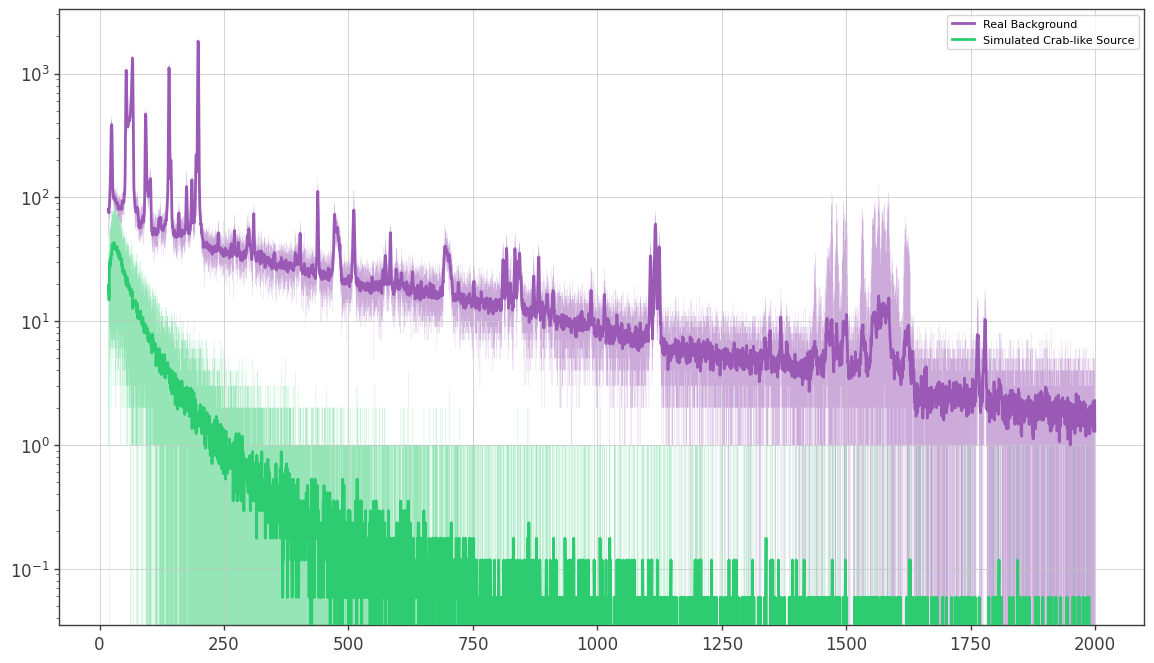

In [13]:
fig, ax = plt.subplots(figsize=(14,8))

ax.grid()
ax.plot(energy_bins[:-1], background_counts_mean, label="Real Background")
ax.fill_between(energy_bins[:-1], background_counts_min, background_counts_max, step="post", alpha=0.5)

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)


ax.plot(energy_bins[:-1], source_counts_mean, label="Simulated Crab-like Source", zorder=10)
ax.fill_between(energy_bins[:-1], source_counts_min, source_counts_max, step="post", alpha=0.5)

#ax.plot(energy_bins[:-1], source_counts_mean * 10, label="Simulated 100xCrab Source", alpha=0.5, color='tab:orange')



ax.legend()
ax.set_yscale("log")

#ax.set_xlim(10,200)


### empty vs crab 

03740002.000000
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)


[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18]
00430002.000000
Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


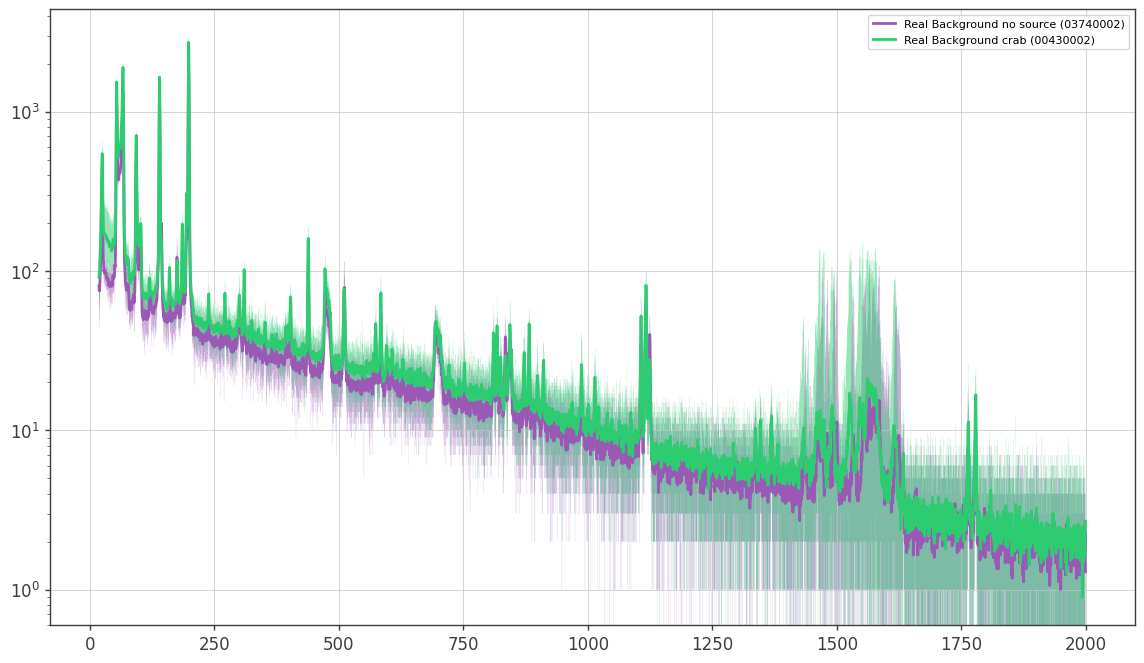

In [14]:
fig, ax = plt.subplots(figsize=(14,8))

no_source = gen_real_background()
#pointing_index 15 is ca. at ra, dec = 10, -40
crab = gen_real_background(data_path=data_path_0043)

ax.grid()
ax.plot(no_source[3][:-1], no_source[0], label="Real Background no source (03740002)")
ax.fill_between(no_source[3][:-1], no_source[1], no_source[2], step="post", alpha=0.5)

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)


ax.plot(crab[3][:-1], crab[0], label="Real Background crab (00430002)")
ax.fill_between(crab[3][:-1], crab[1], crab[2], step="post", alpha=0.5)



ax.legend()
ax.set_yscale("log")



## just background 41 Bins

In [9]:

data_path = "/home/tguethle/Documents/spi/Master_Thesis/spiselect_SPI_Data/0374_100_bins"
data_path = "/home/tguethle/Documents/spi/Master_Thesis/spiselect_SPI_Data/0374"
data_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/data_2003"
# path for data with source
#data_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/pyspi_real_bkg_Timm2_para2/0374"

pointing_index = 31

with fits.open(f"{data_path}/pointing.fits") as file:
    t = Table.read(file[1])
    
    pointings = np.array(t["PTID_SPI"])
    
    
    time_start = np.array(t["TSTART"]) + 2451544.5
    time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
    time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
    
print(pointings[pointing_index])
    
with fits.open(f"{data_path}/energy_boundaries.fits") as file:
    t = Table.read(file[1])
    energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
    energies_bin_width = t["E_MAX"] - t["E_MIN"]
    
with fits.open(f"{data_path}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts = t["COUNTS"]
    
with fits.open(f"{data_path}/dead_time.fits") as file:
    t = Table.read(file[1])
    time_elapsed = np.array(t["LIVETIME"])

time = time_start[pointing_index]
version = find_response_version(time)
rsp_base = ResponseDataRMF.from_version(version)
dets = get_live_dets(time=time, event_types=["single"])

print(dets)

indices = [pointing_index*85 + i for i in dets]
background_counts = counts[indices]
background_time = time_elapsed[indices]
background_counts_41bins_max = np.amax(background_counts, axis=0)
background_counts_41bins_min = np.amin(background_counts, axis=0)
background_counts_41bins_mean = np.average(background_counts, axis=0)



00430046.000000
Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [52]:
def gen_sim_counts(K=7e-4):
    ra, dec = 10, -40
    piv, index = 100, -2
    #K, piv, index = 0.0045, 40, -2
        
    pl = Powerlaw()
    pl.piv = piv
    pl.K = K
    pl.index = index
    component1 = SpectralComponent("pl", shape=pl)
    source = PointSource("Test", ra=ra, dec=dec, components=[component1])

    emod = np.geomspace(10, 3000, 1000)
    spec = source(emod)
    spec_binned = powerlaw_binned_spectrum(emod, spec)

    rmfs = []
    for d in dets:
        rmfs.append(ResponseRMFGenerator.from_time(time, d, energy_bins, emod, rsp_base))

    sds = np.empty(0)
    for d in range(len(dets)):
        sd = SPIDRM(rmfs[d], ra, dec)
        sds = np.append(sds, sd.matrix.T)
    resp_mat = sds.reshape((len(dets), len(emod)-1, len(energy_bins)-1))

    count_rates = np.dot(spec_binned, resp_mat)

    source_counts = np.zeros((len(dets), len(energy_bins)-1))
    for d_i, d in enumerate(dets):
        index = pointing_index * 85 + d
        source_counts[d_i,:] = np.random.poisson(count_rates[d_i,:] * time_elapsed[index])

    source_counts[source_counts == 0] = 1 # workaround for zero counts (plotting fails otherwise)

    source_counts_max = np.amax(source_counts, axis=0)
    source_counts_min = np.amin(source_counts, axis=0)
    source_counts_mean = np.average(source_counts, axis=0)
    
    return source_counts


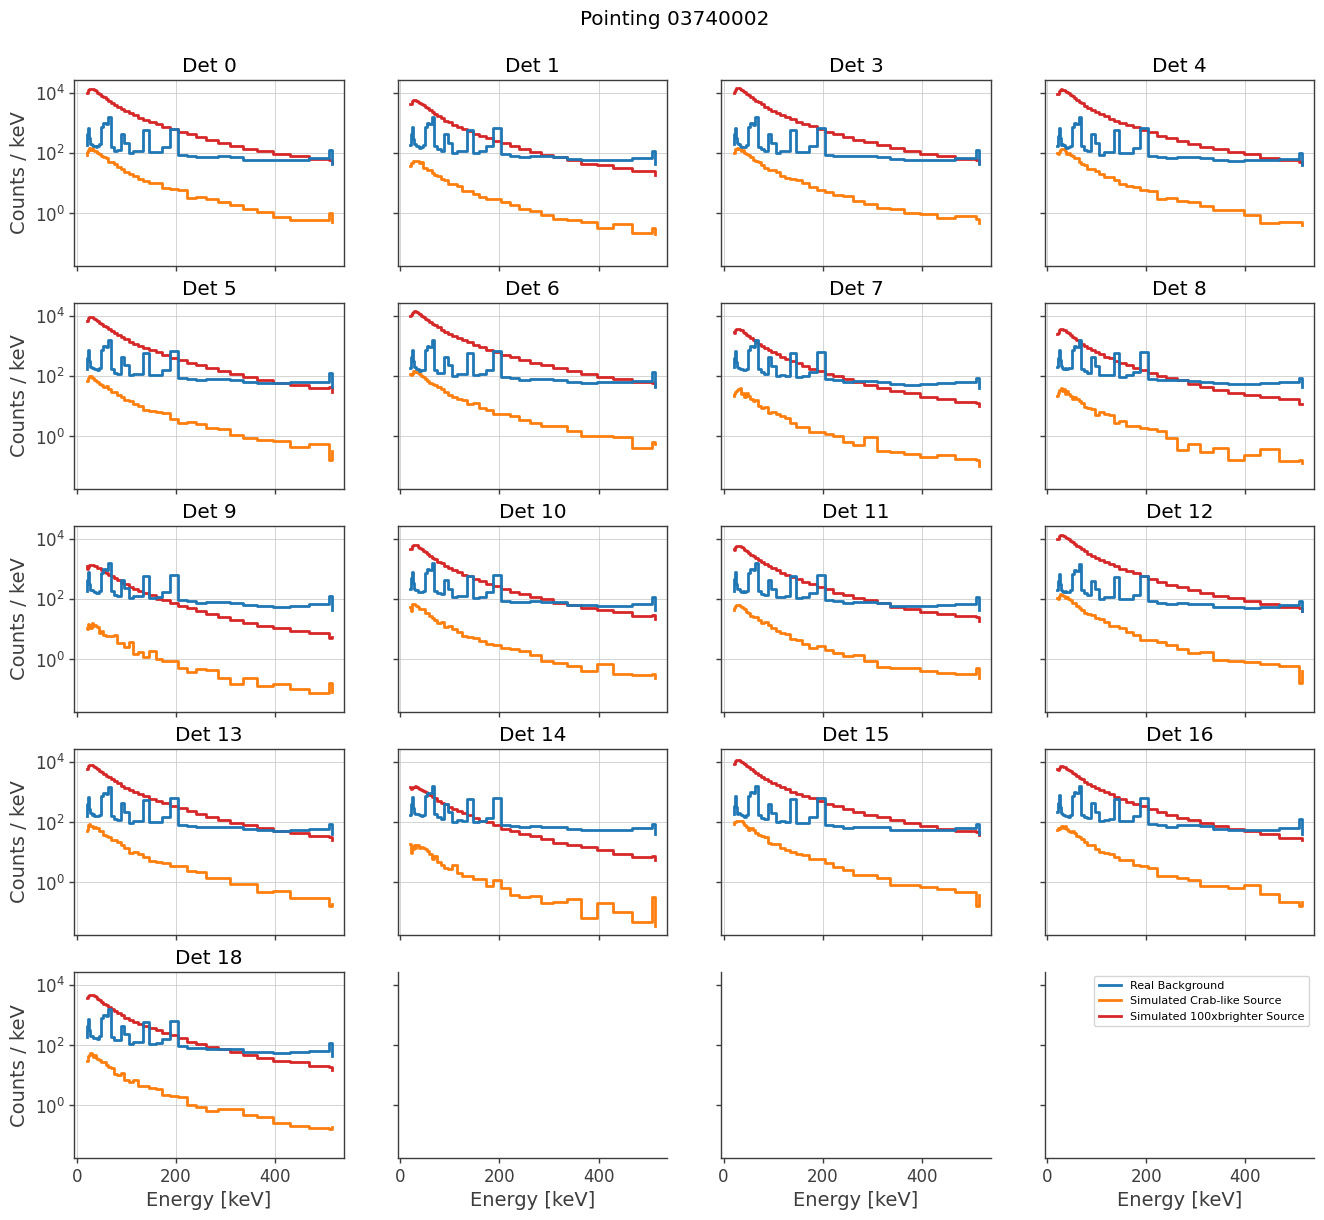

In [53]:
fig, ax = plt.subplots(5,4, sharex=True, squeeze=True, sharey=True, figsize=(16,14))
background_count_rates = np.divide(background_counts, background_time[:, np.newaxis])


source_counts = gen_sim_counts()
bright_source_counts = gen_sim_counts(K=7e-2)

for row in range(5):
    for col in range(4):
        index = row*4 + col
        if index < len(dets):
            det = dets[index]
        else:
            ax[row, col].set_xlabel("Energy [keV]")
            continue
        ax[row, col].grid()
        ax[row, col].set_yscale("log")
        line_back, = ax[row, col].step(energy_bins[:-1], background_counts[index] / energies_bin_width, where='post', label="Real Background", color='tab:blue', zorder=10)
        line_source, = ax[row, col].step(energy_bins[:-1], source_counts[index] / energies_bin_width, where='post', label="Simulated Crab-like Source", color='tab:orange')
        line_source_bright, = ax[row, col].step(energy_bins[:-1], bright_source_counts[index] / energies_bin_width, where='post', label="Simulated 100xbrighter Source", color='tab:red')
        #ax[row, col].fill_between(energy_bins[:-1], background_counts_41bins_min[det], background_counts_41bins_max[det], step="post", alpha=0.5)

        ax[row, col].spines["right"].set_visible(True)
        ax[row, col].spines["top"].set_visible(True)
        ax[row, col].set_title(f"Det {det}")
        if col==0:
            ax[row, col].set_ylabel("Counts / keV")
        if row==4:
            ax[row, col].set_xlabel("Energy [keV]")
fig.suptitle(f'Pointing {pointings[pointing_index][:-7]}', y=0.93)
fig.legend(handles=[line_back, line_source, line_source_bright], loc='lower right', bbox_to_anchor=(0.9, 0.2))


In [54]:
fig.savefig('spectrum_backgorund_source_first_pointing.pdf', bbox_inches='tight')

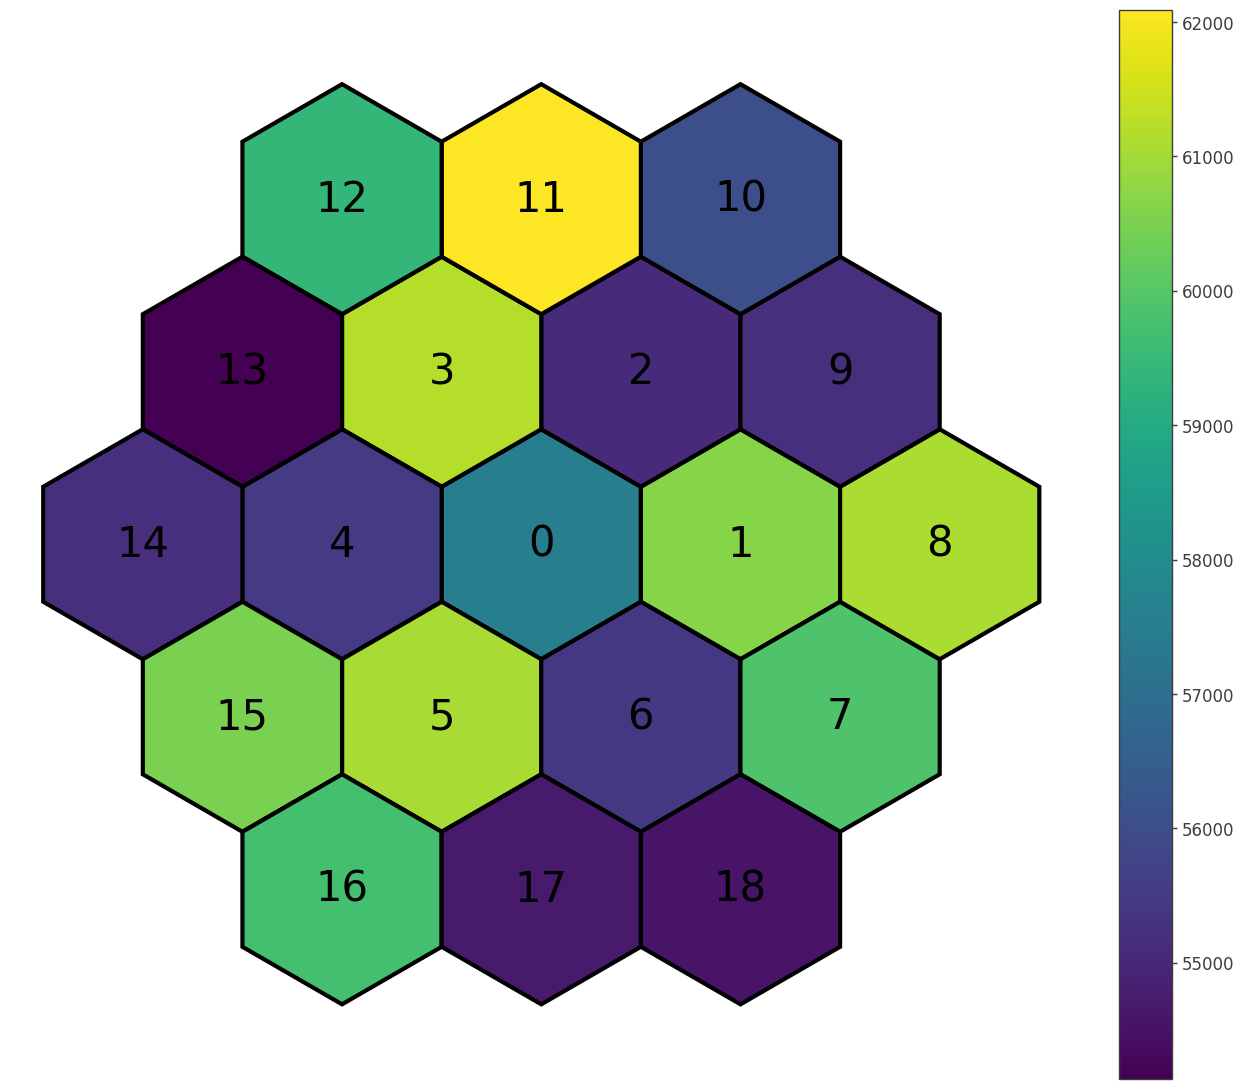

In [11]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon
from pyspi.io.plotting.spi_display import SPI

class MySPI(SPI):
    def plot_conts(self, counts: np.ndarray, show_detector_number=True, **kwargs):
        """
        Plot the counts of the detectors in the SPI detector plane.

        :param counts: The counts of the live detectors (only live Dets).
        :param show_detector_number: If True, the detector number is shown in the center of the detector.
        """
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(15,15))
        d=1
        radius = d*2* 1.732

        # Normalize counts
        norm = Normalize(vmin=counts.min(), vmax=counts.max())
        cmap = cm.viridis  # Choose a colormap
        bad_count = 0
        for i, detector in enumerate(self._detectors):
            if not detector.is_pseudo_detector:
                if detector.bad:
                    color = "white"
                    bad_count += 1
                else:
                    # Map normalized count to color
                    color = cmap(norm(counts[i-bad_count]))

                p = RegularPolygon(xy=tuple(d*j for j in detector.origin),
                                   numVertices=6,
                                   radius=radius,
                                   facecolor=color,
                                   ec='k',
                                   lw=3)
                ax.add_patch(p)

                if show_detector_number:
                    ax.text(d*detector.origin[0],
                            d*detector.origin[1],
                            detector.detector_number,
                            ha="center",
                            va="center",
                            color='k',
                            size=30)

        ax.set_xlim(d*-16, d*16)
        ax.set_ylim(d*-16, d*16)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)

        # Add a colorbar
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

        return fig

spi = MySPI(time=time_start[pointing_index])
#len(spi._detectors)
plot_counts = np.sum(background_counts, axis=1)
plot_counts.shape
fig = spi.plot_conts(plot_counts, title="Background Count Rates", show_detector_number=True)
fig.savefig('det_count_43_46.pdf', bbox_inches='tight')

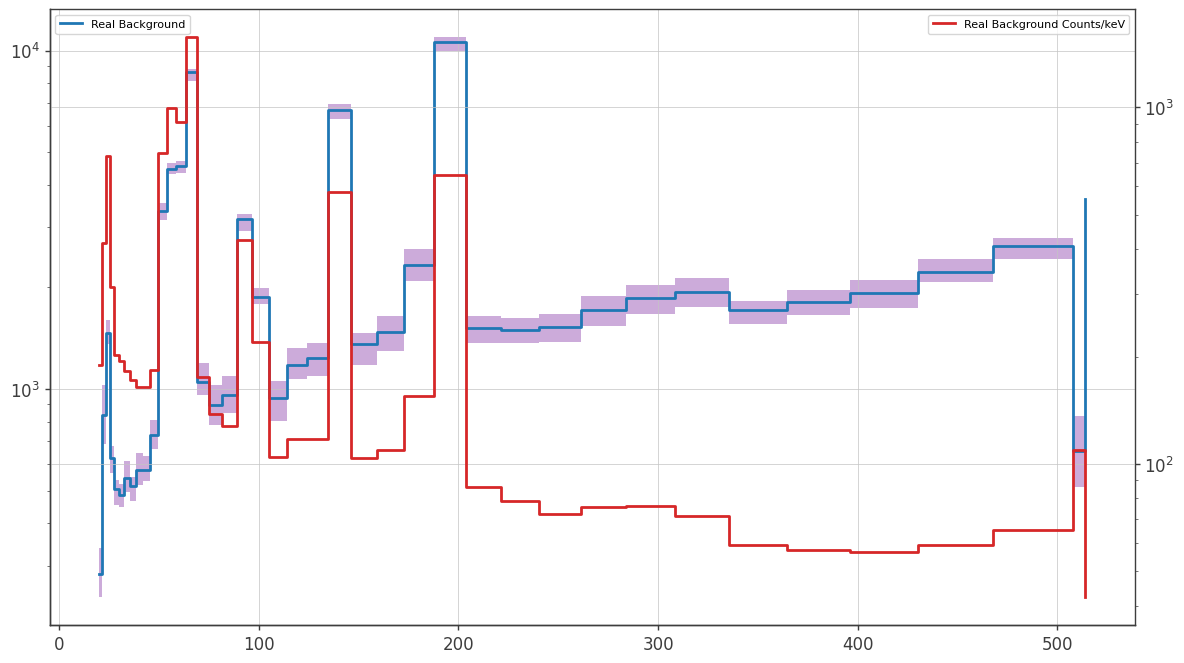

In [63]:
fig, ax = plt.subplots(figsize=(14,8))

ax.grid()
ax.step(energy_bins[:-1], background_counts_41bins_mean ,where="post", label="Real Background", c="tab:blue")
ax.fill_between(energy_bins[:-1], background_counts_41bins_min, background_counts_41bins_max, step="post", alpha=0.5)

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)

ax2 = ax.twinx()

ax2.step(energy_bins[:-1], background_counts_41bins_mean / energies_bin_width ,where="post", label="Real Background Counts/keV", c="tab:red")
#ax.plot(energy_bins[:-1], source_counts_mean, label="Simulated Crab-like Source")
#ax.fill_between(energy_bins[:-1], source_counts_min, source_counts_max, step="post", alpha=0.5)

ax2.grid()

ax.legend(loc="upper left")
ax2.legend()
ax.set_yscale("log")
ax2.set_yscale('log')


## background + source 41 Bins

In [14]:
data_path = "/home/tguethle/Documents/spi/Master_Thesis/spiselect_SPI_Data/0374"
# path for data with source
data_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/pyspi_real_bkg_100_bins/0374"
#data_path = "/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/reduced_counts_Timm2/0374"

pointing_index = 1

with fits.open(f"{data_path}/pointing.fits") as file:
    t = Table.read(file[1])
    
    pointings = np.array(t["PTID_SPI"])
    
    
    time_start = np.array(t["TSTART"]) + 2451544.5
    time_start = [at.Time(f"{i}", format="jd").datetime for i in time_start]
    time_start = np.array([datetime.strftime(i,'%y%m%d %H%M%S') for i in time_start])
    
print(pointings[pointing_index])
    
with fits.open(f"{data_path}/energy_boundaries.fits") as file:
    t = Table.read(file[1])
    energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
    energies_bin_width = t["E_MAX"] - t["E_MIN"]
    
with fits.open(f"{data_path}/evts_det_spec.fits") as file:
    t = Table.read(file[1])
    counts = t["COUNTS"]
    
with fits.open(f"{data_path}/dead_time.fits") as file:
    t = Table.read(file[1])
    time_elapsed = np.array(t["LIVETIME"])

time = time_start[pointing_index]
version = find_response_version(time)
rsp_base = ResponseDataRMF.from_version(version)
dets = get_live_dets(time=time, event_types=["single"])

print(dets)

indices = [pointing_index*85 + i for i in dets]
background_counts = counts[indices]
background_and_source_counts_41bins_max = np.amax(background_counts, axis=0)
background_and_source_counts_41bins_min = np.amin(background_counts, axis=0)
background_and_source_counts_41bins_mean = np.average(background_counts, axis=0)


03740002.000000
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18]


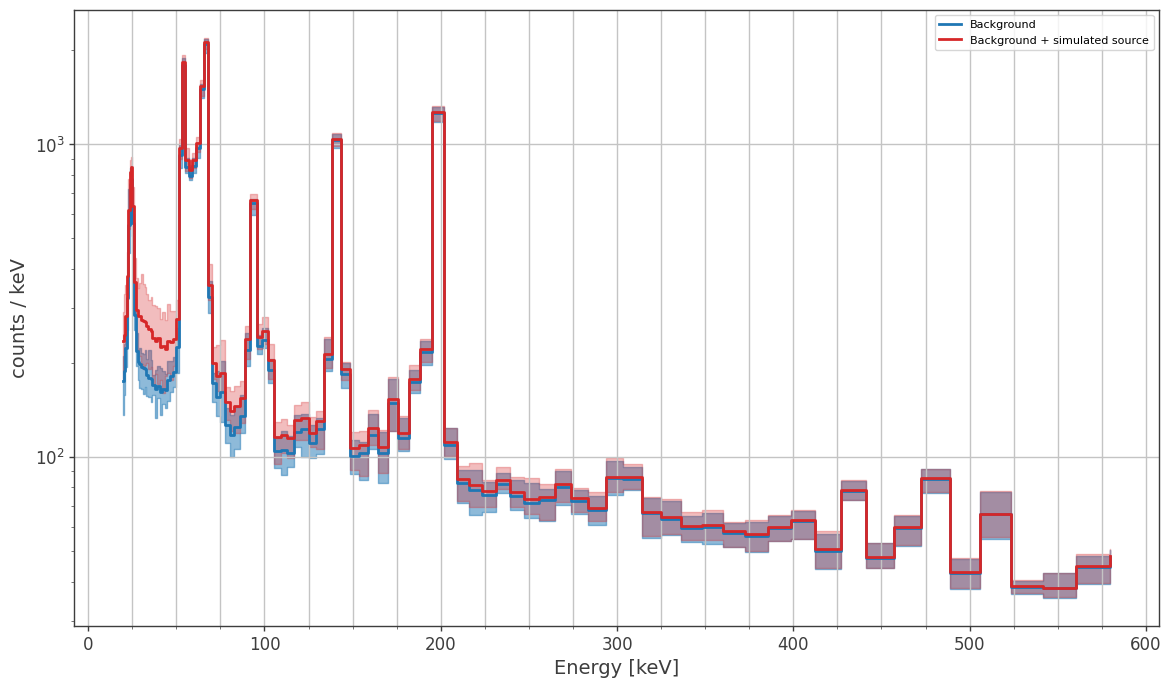

In [15]:
fig, ax = plt.subplots(figsize=(14,8))


ax.step(energy_bins[:-1], background_counts_41bins_mean / energies_bin_width  ,where="post", label="Background", c="tab:blue")
ax.fill_between(energy_bins[:-1], background_counts_41bins_min / energies_bin_width, background_counts_41bins_max / energies_bin_width, step="post", alpha=0.5, color="tab:blue")

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)



ax.step(energy_bins[:-1], background_and_source_counts_41bins_mean / energies_bin_width ,where="post", label="Background + simulated source", c="tab:red")
#ax.plot(energy_bins[:-1], source_counts_mean, label="Simulated Crab-like Source")
ax.fill_between(energy_bins[:-1], background_and_source_counts_41bins_min / energies_bin_width, background_and_source_counts_41bins_max / energies_bin_width, step="post", alpha=0.3, color="tab:red")

ax.set_ylabel("counts / keV")
ax.set_xlabel("Energy [keV]")

ax.xaxis.set_major_locator(ticker.AutoLocator())  # Automatically adjust ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # Add minor ticks with a specific number
ax.grid(which="both", axis="x", linewidth="1")
ax.grid(which="major", axis="y", linewidth="1")


ax.legend()
#ax.set_xlim(20, 600)

ax.set_yscale("log")

